In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import calendar
import argparse
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import xarray as xr
import wrf
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cartopy.crs as ccrs
import seaborn as sns

In [2]:
os.getcwd()

'/glade/work/sonyar/ATM255'

In [59]:
dir = "final_project/newvars/"

wrflist = [
Dataset(dir + "wrfout_d02_2022-08-03_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-03_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_12:00:00")
              ]


# Extract the 'P' variable for all times
qcloud = getvar(wrflist, "QCLOUD", timeidx=ALL_TIMES, method="cat")
# print(qcloud)
# qcloud_sum = qcloud.isel(bottom_top=[0,1,2]).sum(dim=["Time", "bottom_top"], keep_attrs=True)
# qcloud_sum
## ALT - inverse density
inverse_density = getvar(wrflist, "ALT", timeidx=ALL_TIMES, method="cat")
## calc LWC m3 kg-1 * kg kg-1 
# inverse_density = inverse_density.isel(bottom_top=[0,1,2]).mean(dim=["Time", "bottom_top"], keep_attrs=True)

# ## IVGTYP - dominant vegetation category 
# dominant_veg = getvar(wrflist, "IVGTYP", method="cat")
# ## VEGFRA - vegetation fraction
# veg_frac = getvar(wrflist, "VEGFRA", method="cat")
# ## LAI - leaf area index
# lai = getvar(wrflist, "LAI", method="cat")
# ## CANWAT - canopy water 
# canopy_water = getvar(wrflist, "CANWAT", timeidx=ALL_TIMES, method="cat")
# canopy_water_sum = canopy_water.sum(dim=["Time"], keep_attrs=True)
# #
# height = getvar(wrflist, "height", timeidx=ALL_TIMES, method="cat")
# pressure = getvar(wrflist, "pressure", timeidx=ALL_TIMES, method="cat")
# 		# SMOIS:description = "SOIL MOISTURE" ;
# 		# HFX:description = "UPWARD HEAT FLUX AT THE SURFACE" ;
# 		# QFX:description = "UPWARD MOISTURE FLUX AT THE SURFACE" ;
# 		# LH:description = "LATENT HEAT FLUX AT THE SURFACE" ;


In [61]:
# lwc['LWC'].max()
# plot_var = lwc

lwc = xr.merge([qcloud.isel(bottom_top=0) ,inverse_density.isel(bottom_top=0)])
lwc['LWC'] = 1000* lwc['QCLOUD'] / lwc['ALT']
# lwc = lwc.drop_vars(['QCLOUD', 'ALT'])
# lwc = lwc.isel(bottom_top=[0,1,2]).sum(dim=[ "bottom_top"], keep_attrs=True)


In [119]:
subset_lwc = lwc.sel(south_north=[170, 300], west_east=[510, 550])
    # lwc.south_north(41, -124)(38, -122)


In [48]:
np.where(to_np(plot_var.isel(Time = i )['LWC']) ==0, np.nan, to_np(plot_var.isel(Time = i )['LWC']) )


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

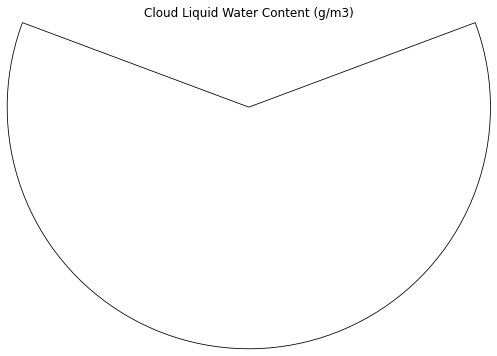

/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


In [120]:
# for i in range(21):  ##plot dominant veg
# Get the latitude and longitude points
plot_var = lwc
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure


# def init():
#     ax.contourf()
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=cart_proj)

    
# plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])
def animate(i):
# Set the GeoAxes to the projection used by WRF

    ax.clear()
    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    ax.set_xlim(cartopy_xlim(plot_var))
    ax.set_ylim(cartopy_ylim(plot_var))
    # mark a known place to help us geo-locate ourselves
 # mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

    # to_np(subset_lwc['XLONG'].max())
    # to_np(subset_lwc['XLONG'].min())
    # to_np(subset_lwc['XLAT'].max())
    # to_np(subset_lwc['XLAT'].max())
    ax.plot(to_np(subset_lwc['XLONG'].max()),to_np(subset_lwc['XLAT'].max()), 'gx', markersize=4, transform=ccrs.Geodetic())
    ax.plot(to_np(subset_lwc['XLONG'].min()),to_np(subset_lwc['XLAT'].max()), 'gx', markersize=4, transform=ccrs.Geodetic())
    ax.plot(to_np(subset_lwc['XLONG'].max()),to_np(subset_lwc['XLAT'].min()), 'gx', markersize=4, transform=ccrs.Geodetic())
    ax.plot(to_np(subset_lwc['XLONG'].min()),to_np(subset_lwc['XLAT'].min()), 'gx', markersize=4, transform=ccrs.Geodetic())


    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.contourf(to_np(lons), to_np(lats),
             np.where(to_np(plot_var.isel(Time = i )['LWC']) ==0, np.nan, to_np(plot_var.isel(Time = i )['LWC']) )
             , 10, vmin = 0, vmax = 0.5,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))
#     # fig.colorbar(cf, ax=ax, shrink=.98)
#     plt.barbs(to_np(lons[::100,::100]), to_np(lats[::100,::100]),
#               to_np(u_500.isel(Time = i)[::100, ::100]), to_np(v_500.isel(Time = i)[::100, ::100]),
#               transform=crs.PlateCarree(), length=6)


    plt.show()

ani = FuncAnimation(fig, animate, frames=23, interval = 600)


plt.title("Cloud Liquid Water Content (g/m3)" )


plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
#                     interval=100)

    # plt.show()
ani.save('lwc_fodges_on.gif', writer='imagemagick')



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

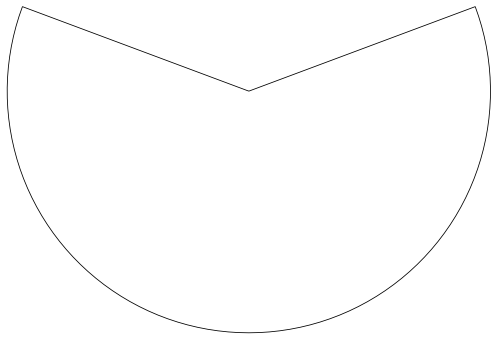

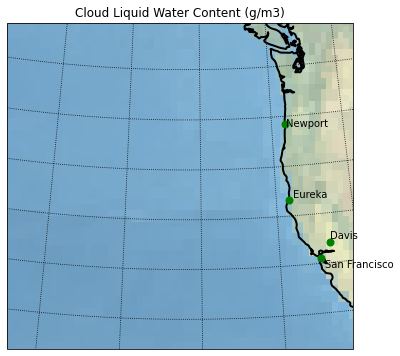

In [54]:
# for i in range(21):  ##plot dominant veg
# Get the latitude and longitude points
plot_var = lwc
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure


# def init():
#     ax.contourf()
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=cart_proj)

    
# plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])
for i in range(23):# Set the GeoAxes to the projection used by WRF

    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=cart_proj)

    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    ax.set_xlim(cartopy_xlim(plot_var))
    ax.set_ylim(cartopy_ylim(plot_var))
    # mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.contourf(to_np(lons), to_np(lats),
             np.where(to_np(plot_var.isel(Time = i )['LWC']) ==0, np.nan, to_np(plot_var.isel(Time = i )['LWC']) )
             , 10, vmin = 0, vmax = 0.5,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))
    plt.title("Cloud Liquid Water Content (g/m3)" )
    cb = plt.colorbar(ax=ax, shrink=.98)

    plt.show()

# ani = FuncAnimation(fig, animate, frames=21, interval = 100)




# plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
#                     interval=100)

    # plt.show()
# ani.save('lwc.gif', writer='imagemagick')



In [93]:
# z = getvar(ncfile, "z", units="dm")
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
p = getvar(wrflist, "pressure",  timeidx=ALL_TIMES, method="cat")
ua = getvar(wrflist, "ua", timeidx=ALL_TIMES, method="cat", units="kt")
va = getvar(wrflist, "va", timeidx=ALL_TIMES, method="cat", units="kt")
wspd = getvar(wrflist, "wspd_wdir", timeidx=ALL_TIMES, method="cat", units="kts")

# Open the NetCDF file
VDFG
# # Extract the pressure, geopotential height, and wind variables
# p = getvar(ncfile, "pressure")
# z = getvar(ncfile, "z", units="dm")
# ua = getvar(ncfile, "ua", units="kt")
# va = getvar(ncfile, "va", units="kt")
# wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]

# Interpolate geopotential height, u, and v winds to 500 hPa
# ht_500 = interplevel(z, p, 900)
# u_500 = interplevel(ua, p, 900)
# v_500 = interplevel(va, p, 900)
# wspd_500 = interplevel(wspd, p, 900)




In [124]:
VDFG = getvar(wrflist, "VDFG", timeidx=ALL_TIMES, method="cat")
i = 0
to_np(VDFG.isel(Time = i)['Time'])

numpy.datetime64('2022-08-03T00:00:00.000000000')

/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


2022-08-03T00:00:00.000000000


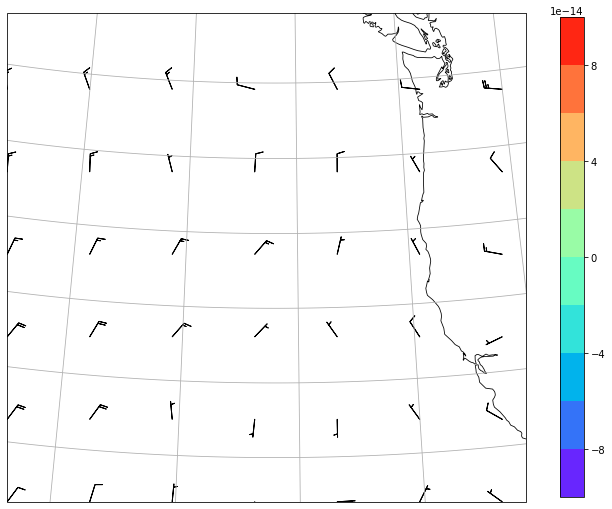

2022-08-03T06:00:00.000000000


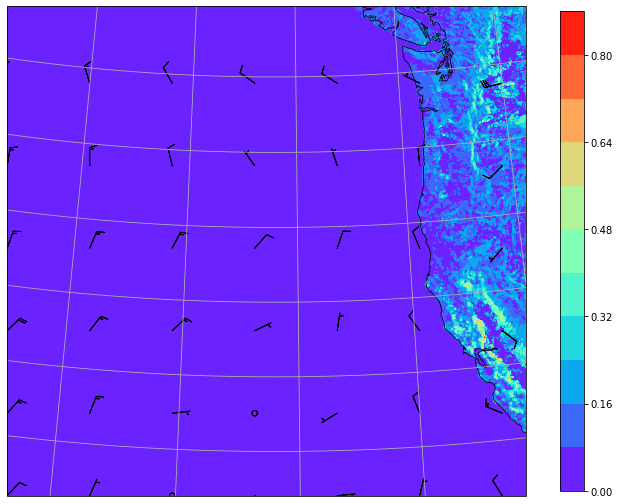

2022-08-03T12:00:00.000000000


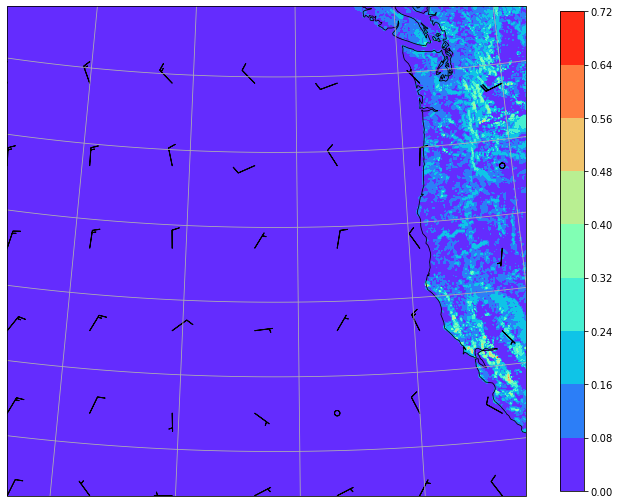

2022-08-03T18:00:00.000000000


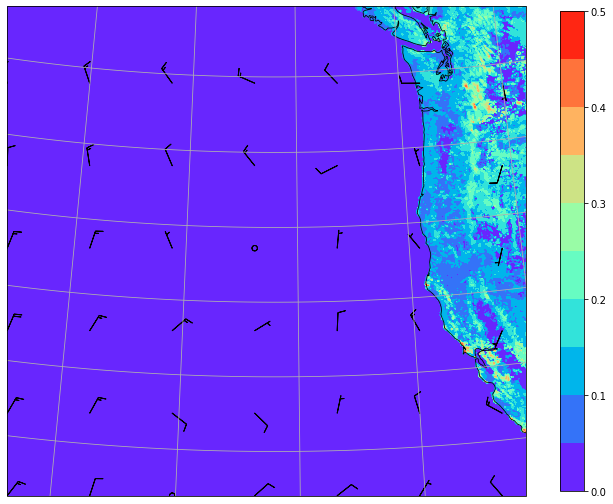

2022-08-04T00:00:00.000000000


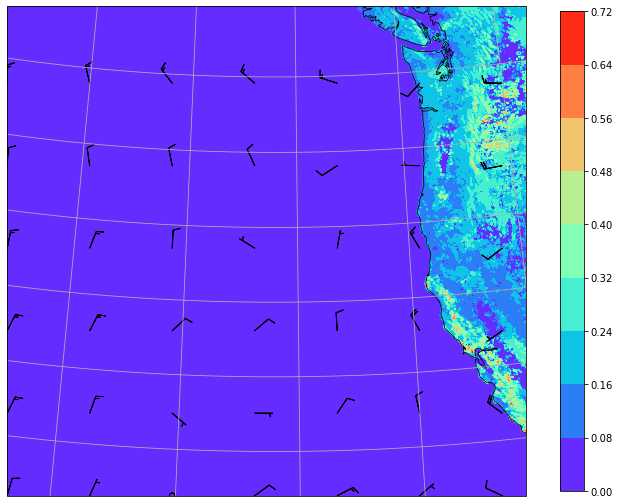

2022-08-04T06:00:00.000000000


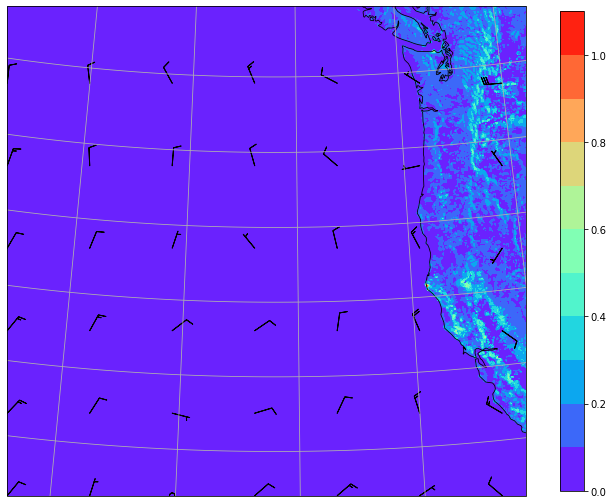

2022-08-04T12:00:00.000000000


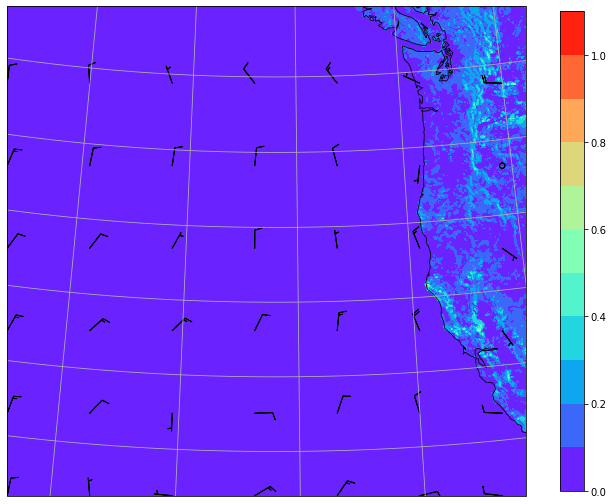

2022-08-04T18:00:00.000000000


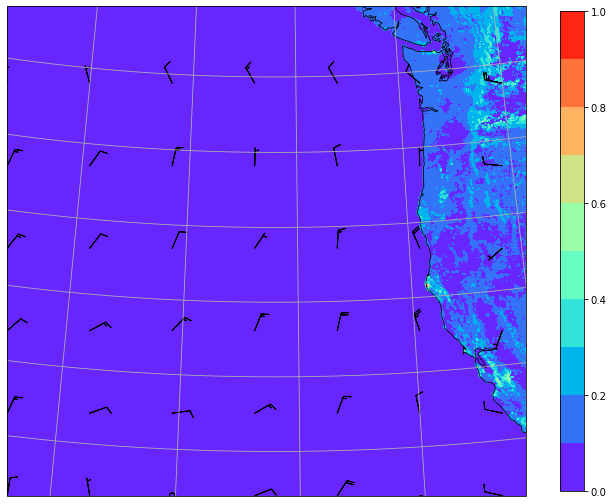

2022-08-05T00:00:00.000000000


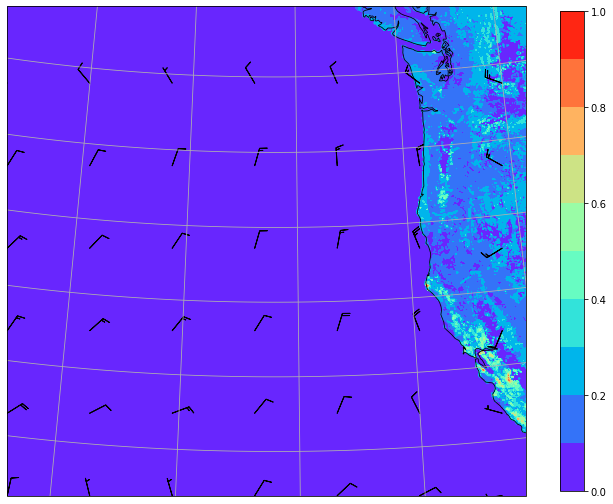

2022-08-05T06:00:00.000000000


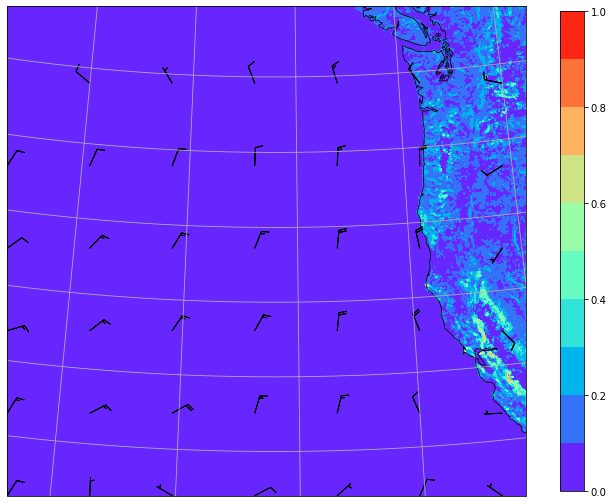

2022-08-05T12:00:00.000000000


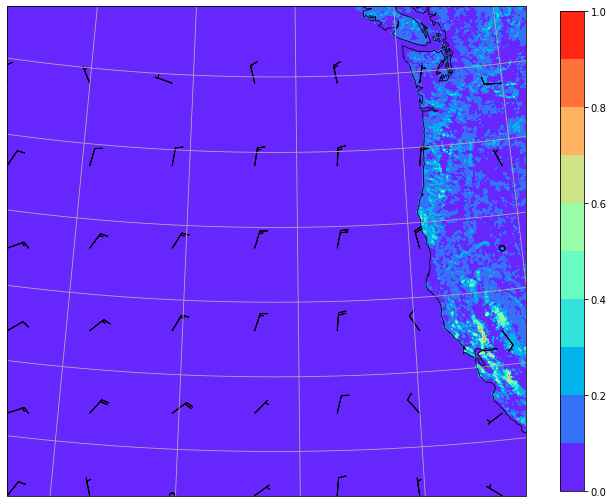

2022-08-05T18:00:00.000000000


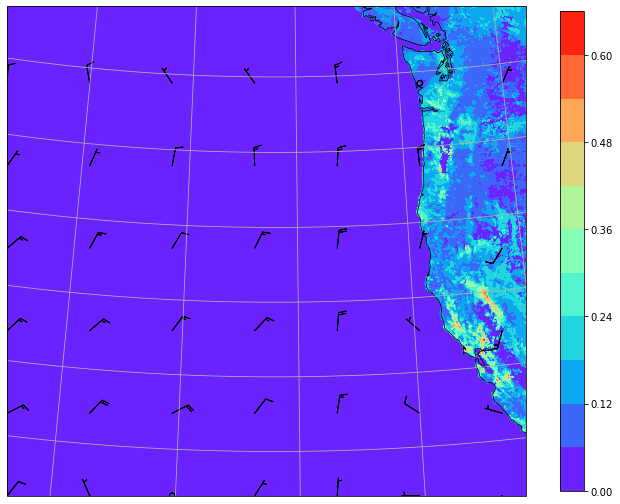

2022-08-06T00:00:00.000000000


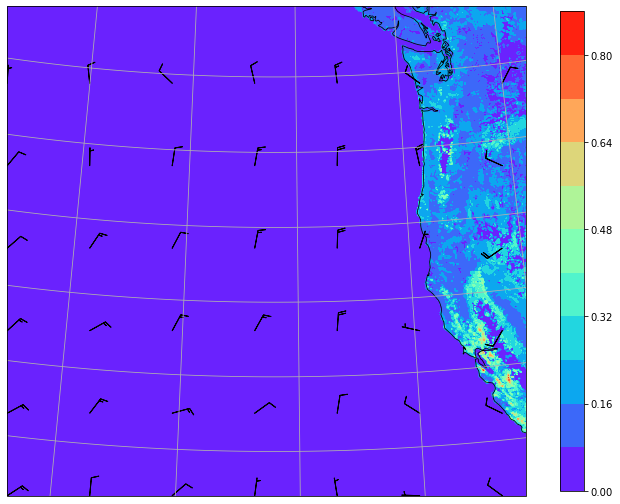

2022-08-06T06:00:00.000000000


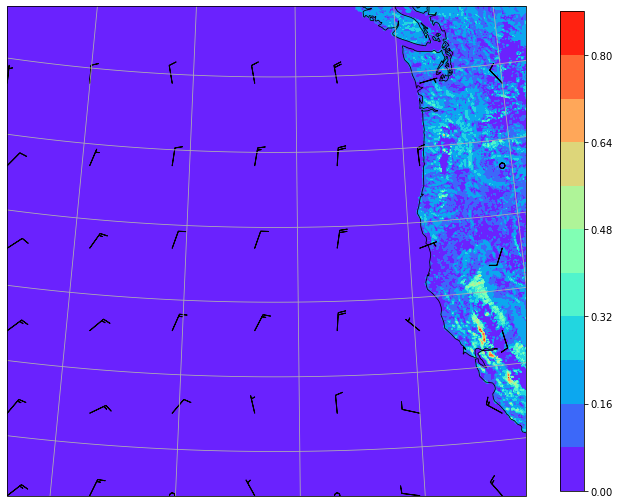

2022-08-06T12:00:00.000000000


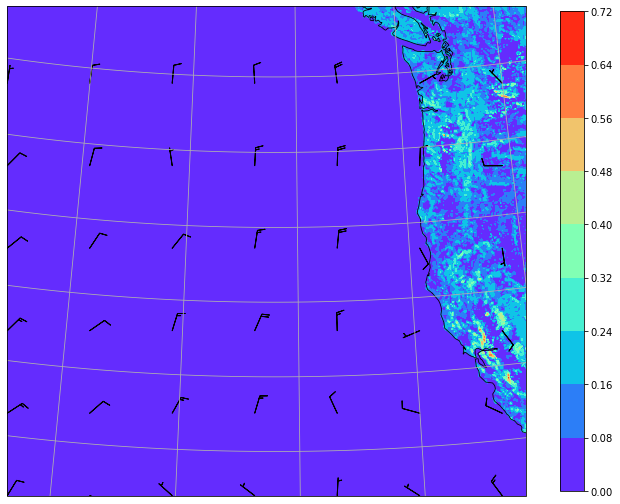

2022-08-06T18:00:00.000000000


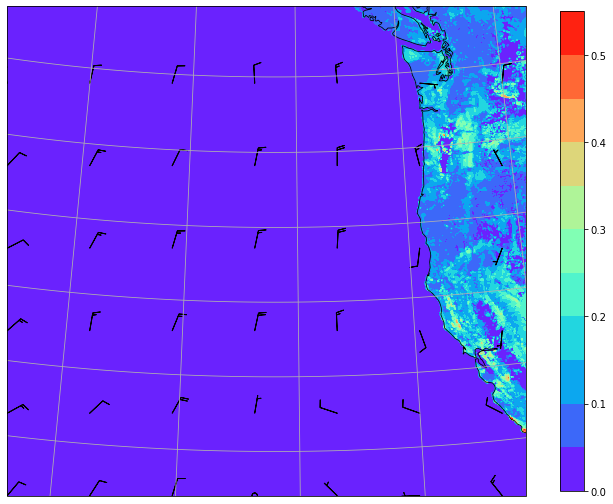

2022-08-07T00:00:00.000000000


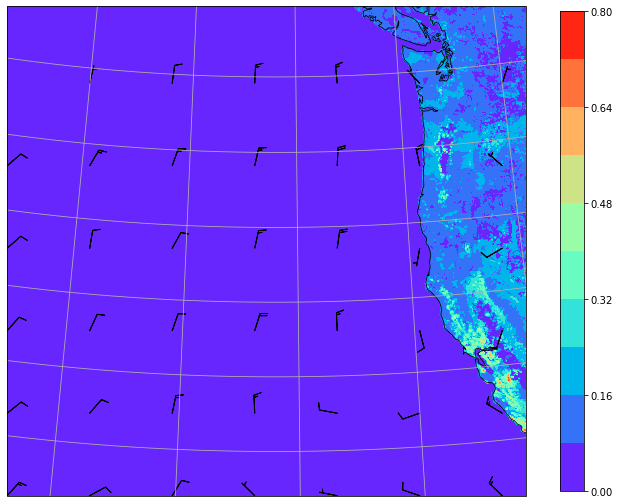

2022-08-07T06:00:00.000000000


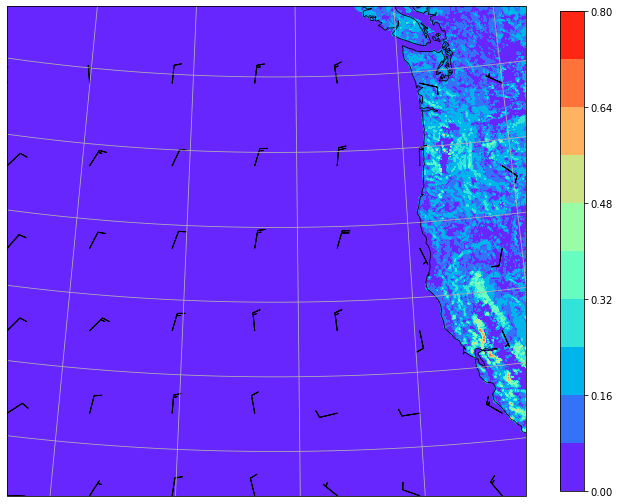

2022-08-07T12:00:00.000000000


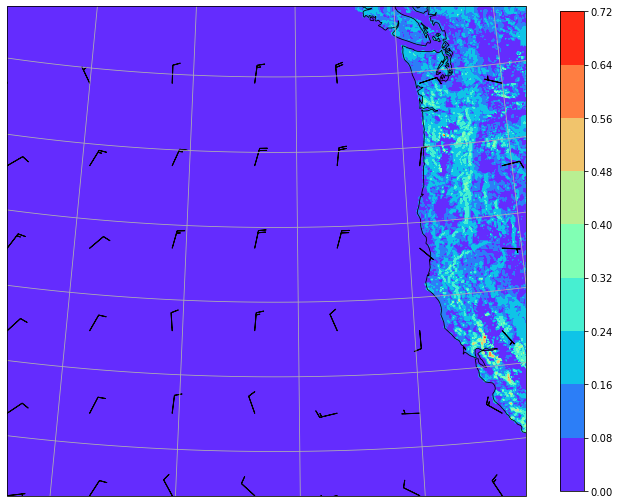

2022-08-07T18:00:00.000000000


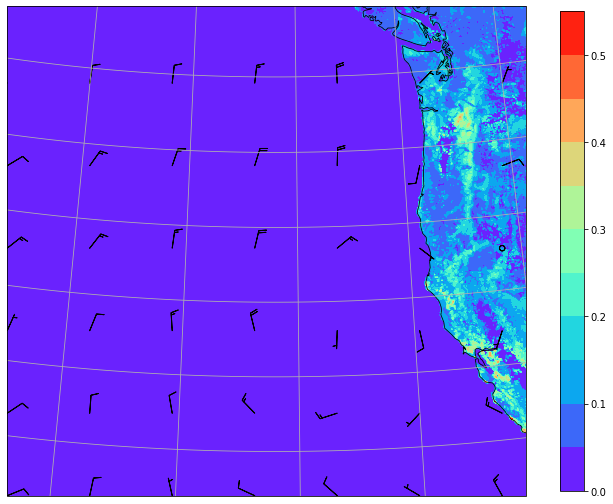

2022-08-08T00:00:00.000000000


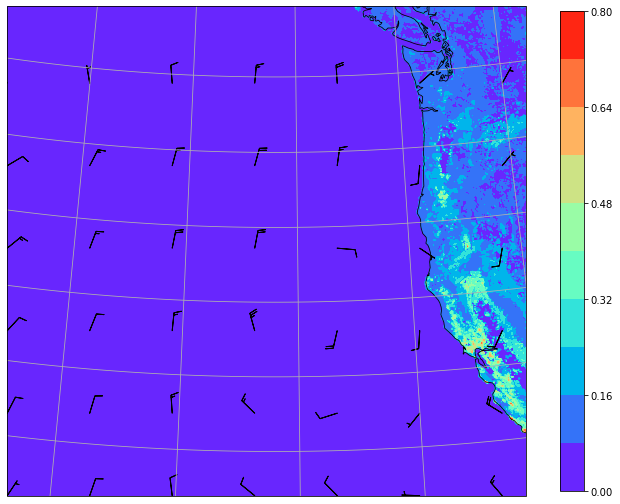

2022-08-08T06:00:00.000000000


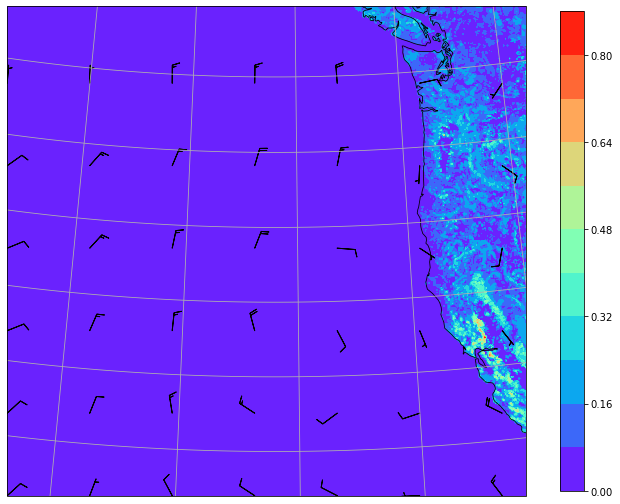

2022-08-08T12:00:00.000000000


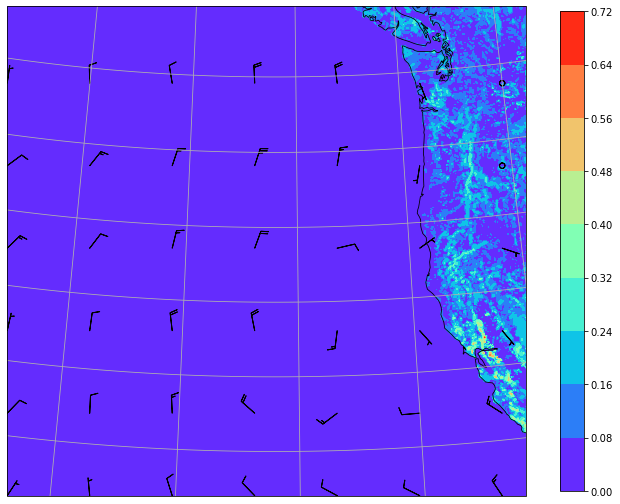

In [127]:
# fig = plt.figure(figsize=(12,6))
# ax = plt.axes(projection=cart_proj)

lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure

# def animate(i):
    # ax.clear()

for i in range(23):  ##plot dominant veg
    fig = plt.figure(figsize=(12,9))
    # ax = plt.axes(projection=cart_proj)

    ax = plt.axes(projection=cart_proj)

# Get the lat/lon coordinates
   # Download and add the states and coastlines
    ax.coastlines('50m', linewidth=0.8)

    # Add the 500 hPa geopotential height contours
    # levels = np.arange(520., 580., 6.)
    # contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),
    #                        levels=levels, colors="black",
    #                        transform=crs.PlateCarree())
    # plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

    # Add the wind speed contours
    # levels = [0, 4,  8,  12, 16,  20, 24]
    wspd_contours = plt.contourf(to_np(lons), to_np(lats), 
                                 # to_np(VDFG.isel(Time = i)),
         np.where(to_np(VDFG.isel(Time = i )) ==0, np.nan, to_np(VDFG.isel(Time = i )) ),

                                 # levels=levels,
                                 10,
                                 cmap=get_cmap("rainbow"),
                                 transform=crs.PlateCarree())
    # plt.colorbar(wspd_contours, ax=ax, orientation="right", pad=.05)
    cb = plt.colorbar(ax=ax, shrink=.98)

    # Add the 500 hPa wind barbs, only plotting every 125th data point.
    plt.barbs(to_np(lons[::100,::100]), to_np(lats[::100,::100]),
              to_np(u_500.isel(Time = i)[::100, ::100]), to_np(v_500.isel(Time = i)[::100, ::100]),
              transform=crs.PlateCarree(), length=6)

    # Set the map bounds
    ax.set_xlim(cartopy_xlim(ht_500))
    ax.set_ylim(cartopy_ylim(ht_500))

    ax.gridlines()
    print(to_np(VDFG.isel(Time = i)['Time']))
    plt.show()
    
    

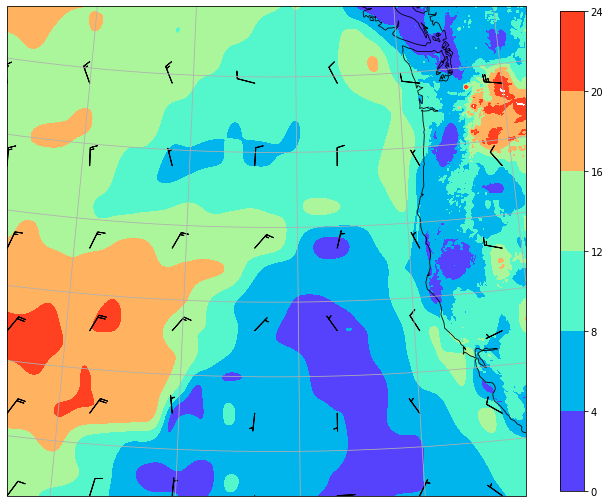

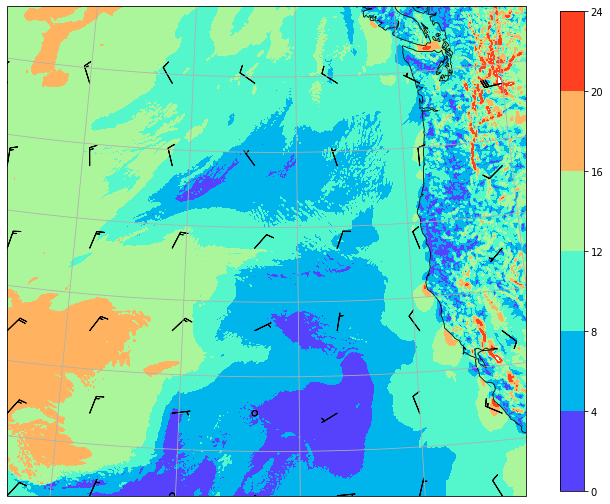

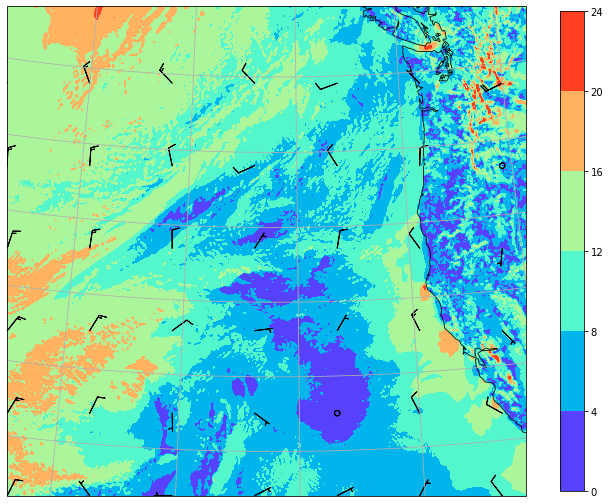

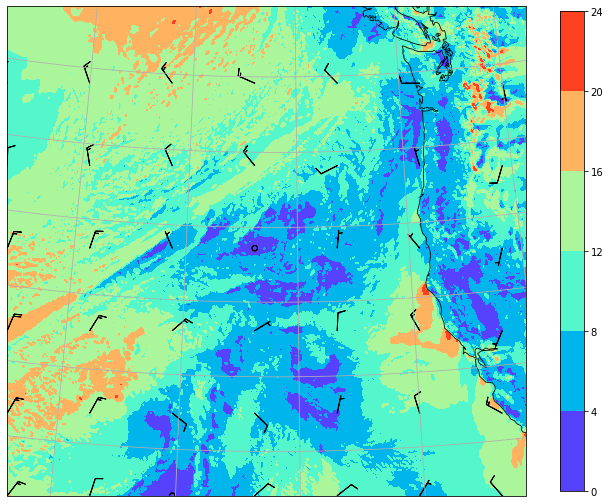

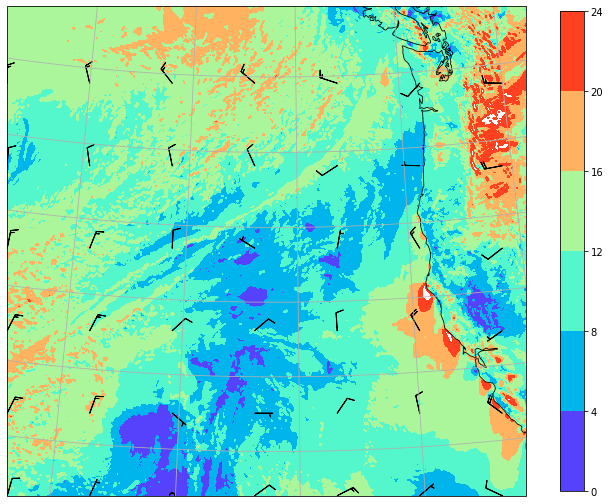

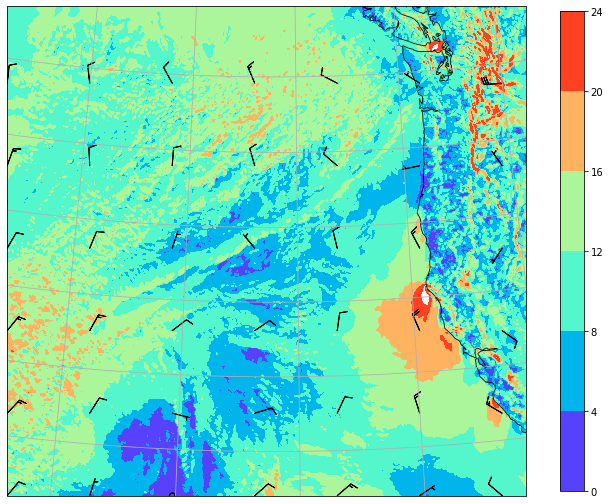

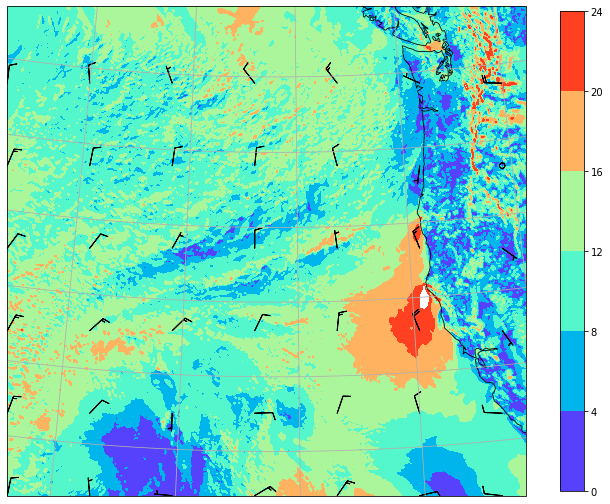

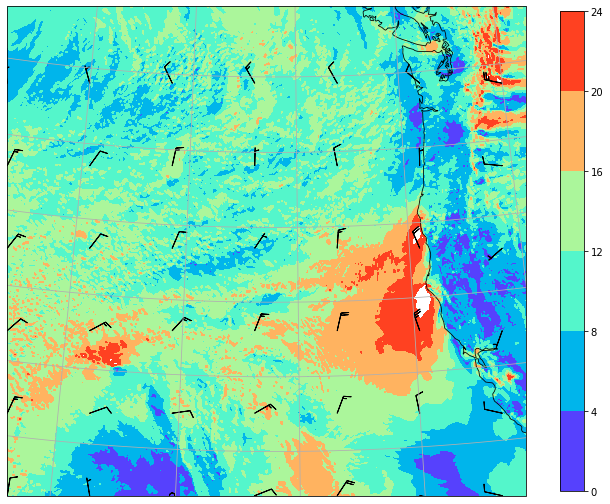

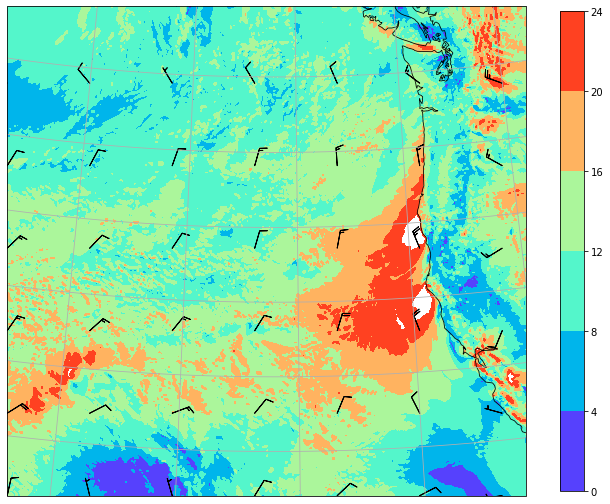

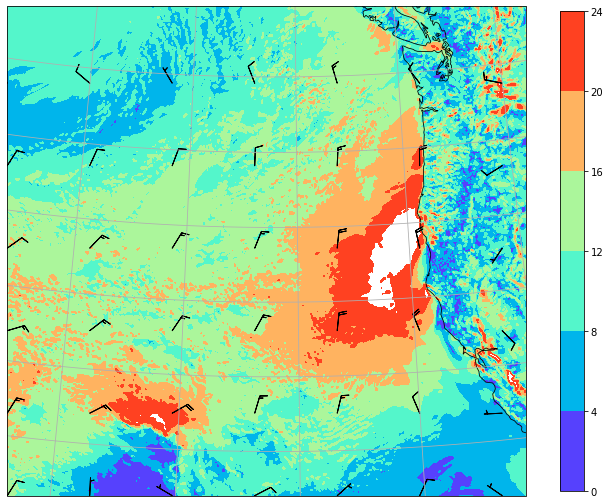

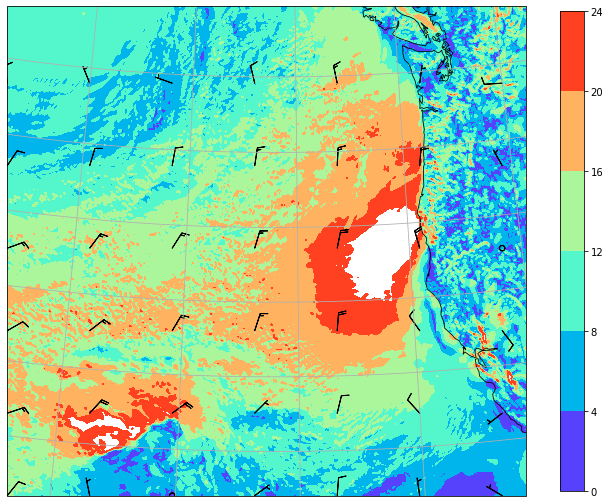

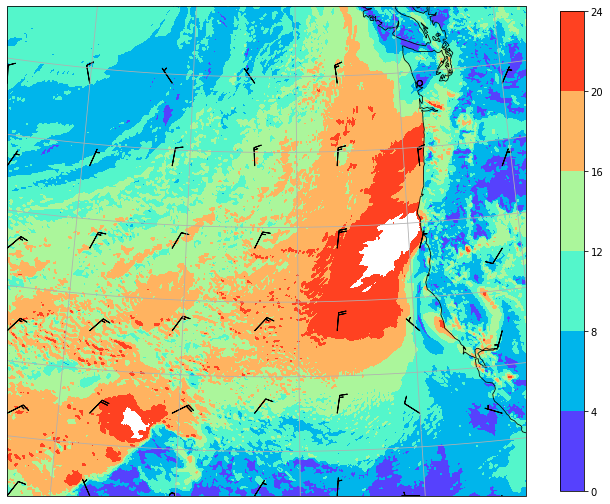

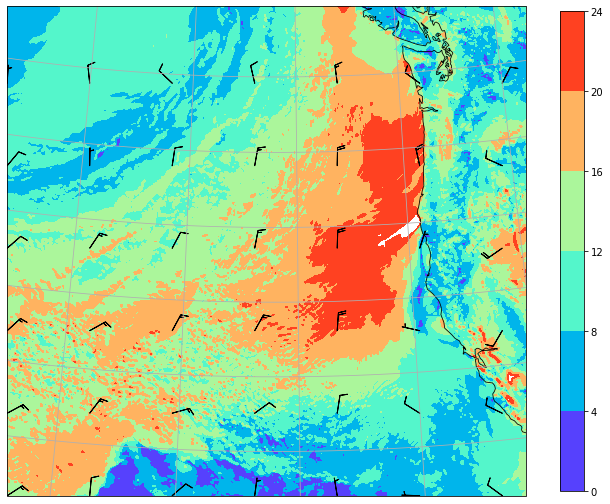

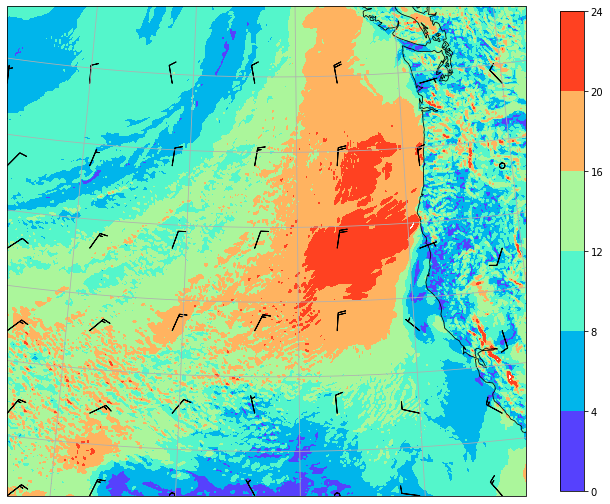

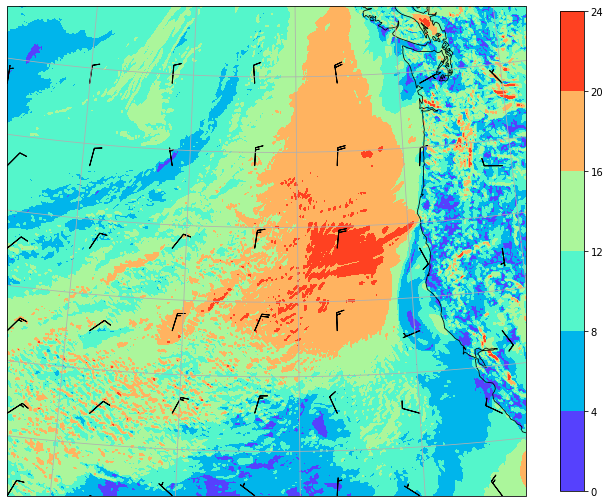

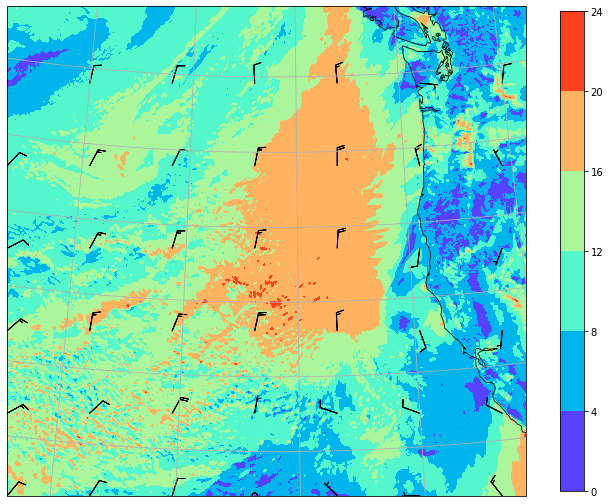

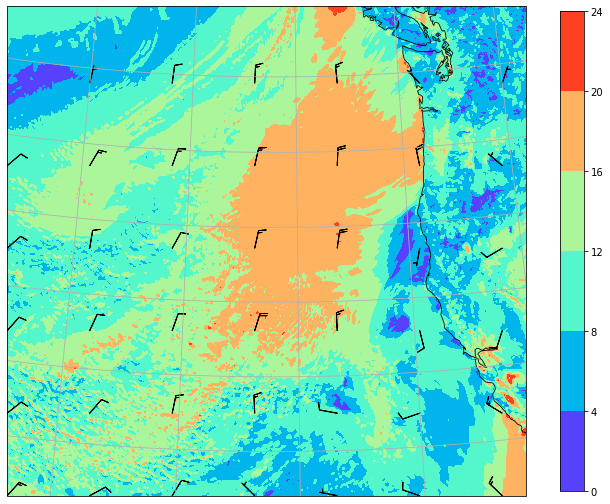

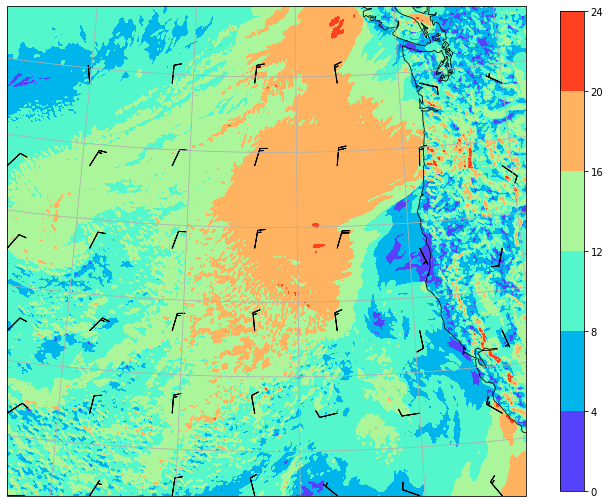

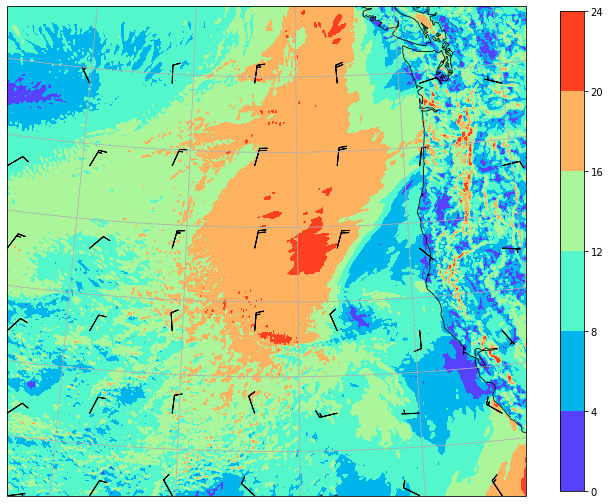

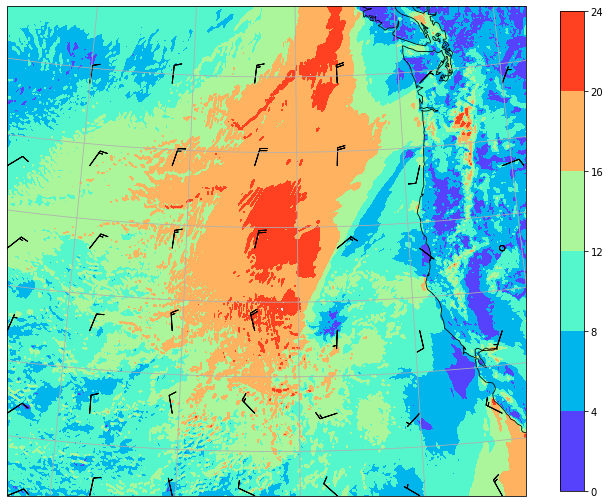

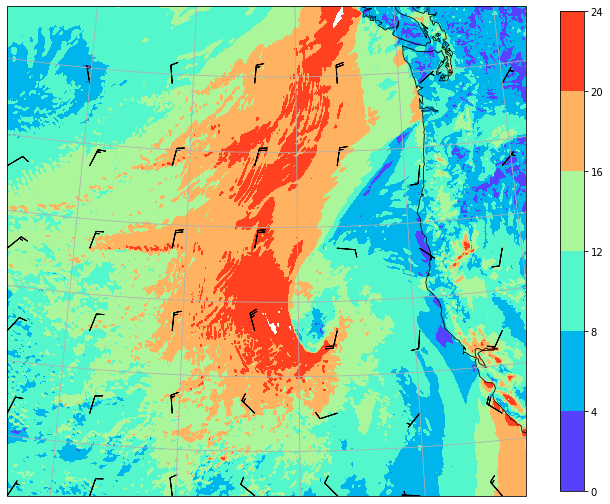

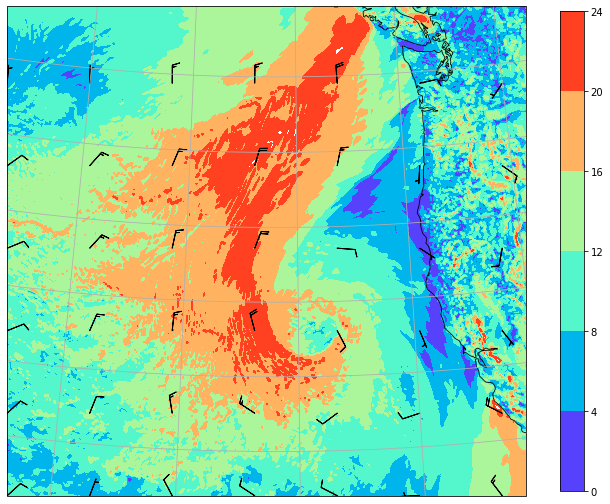

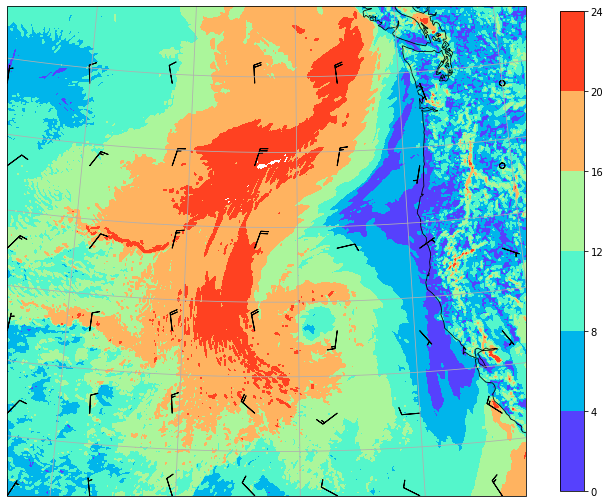

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

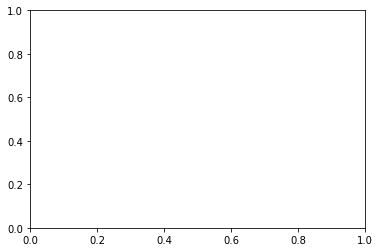

In [113]:
# fig = plt.figure(figsize=(12,6))
# ax = plt.axes(projection=cart_proj)

lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure

# def animate(i):
    # ax.clear()

for i in range(27):  ##plot dominant veg
    fig = plt.figure(figsize=(12,9))
    # ax = plt.axes(projection=cart_proj)

    ax = plt.axes(projection=cart_proj)

# Get the lat/lon coordinates
   # Download and add the states and coastlines
    ax.coastlines('50m', linewidth=0.8)

    # Add the 500 hPa geopotential height contours
    # levels = np.arange(520., 580., 6.)
    # contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),
    #                        levels=levels, colors="black",
    #                        transform=crs.PlateCarree())
    # plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

    # Add the wind speed contours
    levels = [0, 4,  8,  12, 16,  20, 24]
    wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500.isel(Time = i)),
                                 levels=levels,
                                 cmap=get_cmap("rainbow"),
                                 transform=crs.PlateCarree())
    # plt.colorbar(wspd_contours, ax=ax, orientation="right", pad=.05)
    cb = plt.colorbar(ax=ax, shrink=.98)

    # Add the 500 hPa wind barbs, only plotting every 125th data point.
    plt.barbs(to_np(lons[::100,::100]), to_np(lats[::100,::100]),
              to_np(u_500.isel(Time = i)[::100, ::100]), to_np(v_500.isel(Time = i)[::100, ::100]),
              transform=crs.PlateCarree(), length=6)

    # Set the map bounds
    ax.set_xlim(cartopy_xlim(ht_500))
    ax.set_ylim(cartopy_ylim(ht_500))

    ax.gridlines()
    print(to_np(VDFG.isel(Time = i)['Time']))
    plt.show()
    



In [101]:
ht_500 = z.isel(bottom_top=0)
u_500 = ua.isel(bottom_top=0)
v_500 = va.isel(bottom_top=0)
wspd_500 = wspd.isel(bottom_top=0)

wspd_500 = wspd_500.isel(wspd_wdir=0)

ValueError: x, y, u and v arrays must be the same shape

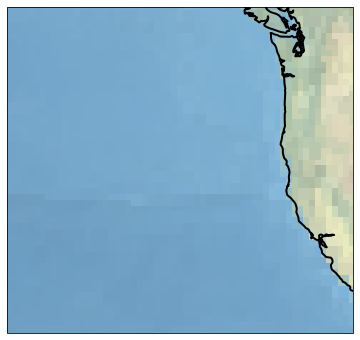

In [80]:
for i in range(24):  ##plot dominant veg
    # Get the latitude and longitude points
    plot_var = lwc
    lats, lons = latlon_coords(plot_var)

    # Get the cartopy mapping object
    cart_proj = get_cartopy(plot_var)

    # Create a figure
    fig = plt.figure(figsize=(12,6))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    # states = NaturalEarthFeature(category="cultural", scale="50m",
    #                              facecolor="none",
    #                              name="admin_1_states_provinces_shp")
    # ax.add_feature(states, linewidth=.5, edgecolor="black")
    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    # ax.states()
    # Make the contour outlines and filled contours for the smoothed sea level
    # pressure.
    plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
                transform=crs.PlateCarree())
    # cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
    # Set the map bounds
    ax.set_xlim(cartopy_xlim(plot_var))
    ax.set_ylim(cartopy_ylim(plot_var))

    # levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
    # wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500),
    #                              # levels=levels,
    #                              10,
    #                              cmap=get_cmap("rainbow"),
    #                              transform=crs.PlateCarree())
    # plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

    # Add the 500 hPa wind barbs, only plotting every 125th data point.
    plt.barbs(to_np(lons[::100,::100]), to_np(lats[::100,::100]),
              to_np(u_500.isel(Time = i)[::100, ::100]), to_np(v_500.isel(Time = i)[::100, ::100]),
              transform=crs.PlateCarree(), length=6)


    # mark a known place to help us geo-locate ourselves

# mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    plt.title("Cloud Liquid Water Content (g/m3)" )
    plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])

    plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
    #                     interval=100)

    # plt.show()
    # ani.save('sine_wave.gif', writer='imagemagick')

In [7]:
print(lwc['LWC'].max())
# print(lwc['QCLOUD'].max())

<xarray.DataArray 'LWC' ()>
array(2.73150182)


In [188]:
# del dominant_veg, veg_frac
# del lai, canopy_water, canopy_water_sum

In [106]:
cartopy_xlim(plot_var) * np.array([0.5, 1])
cartopy_ylim(plot_var) *np.array([0.5, .5])


array([-460499.39631137,  429000.48758387])

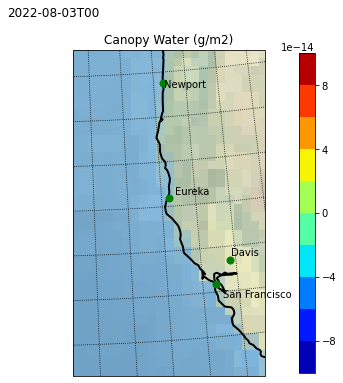

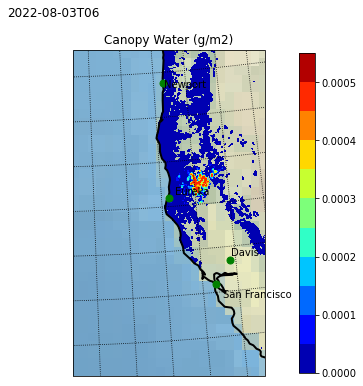

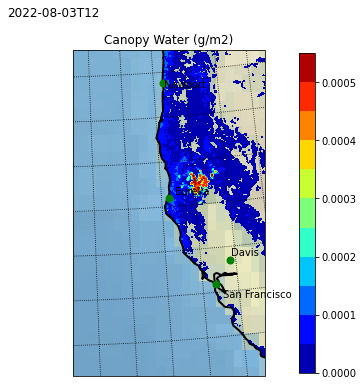

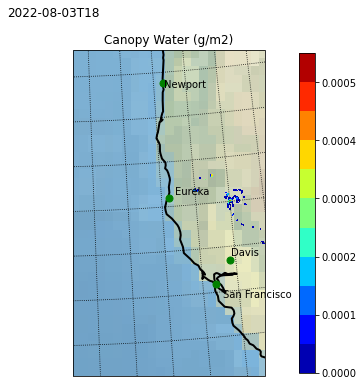

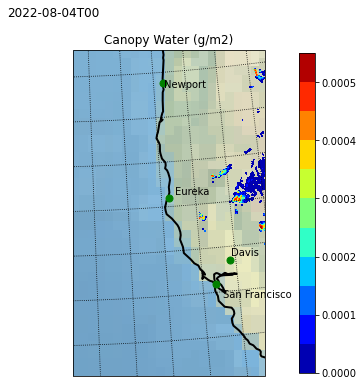

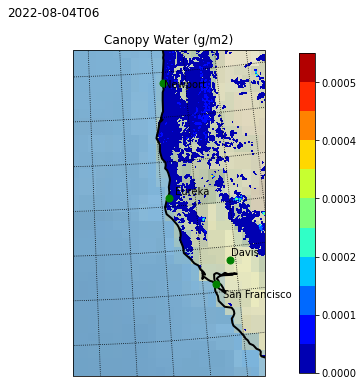

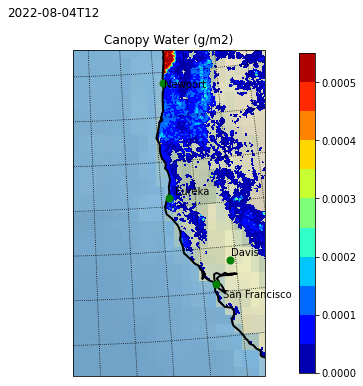

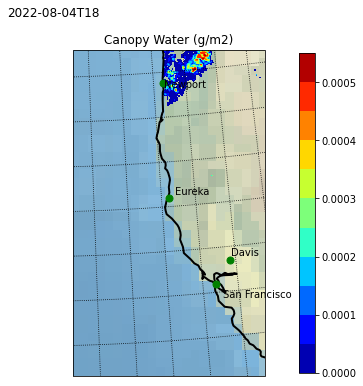

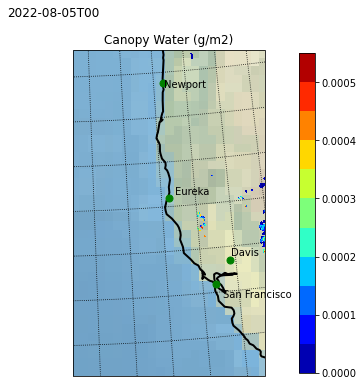

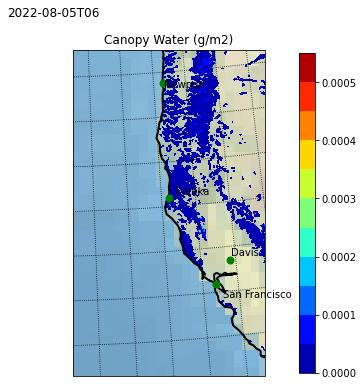

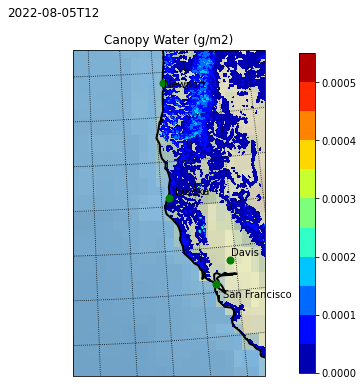

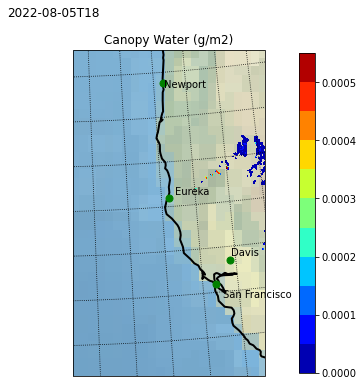

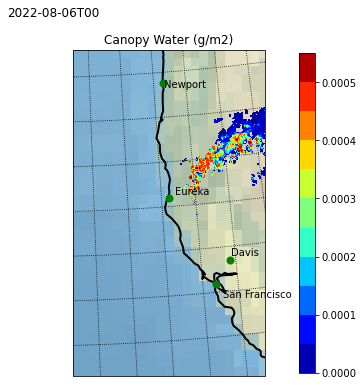

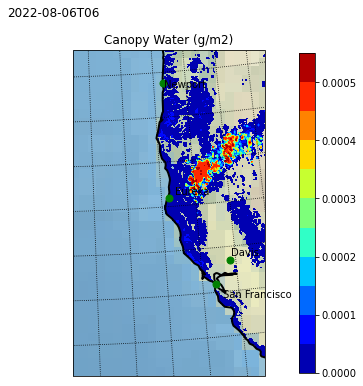

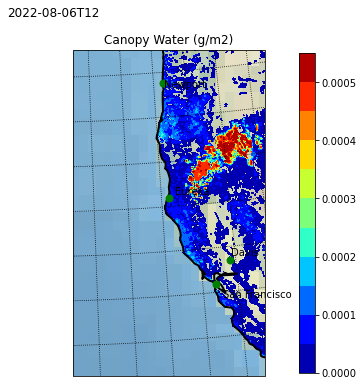

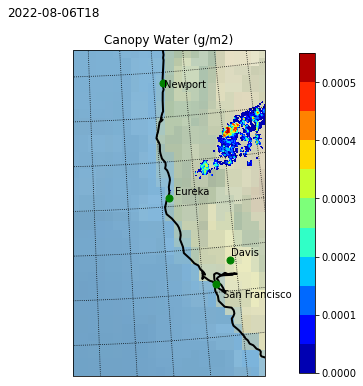

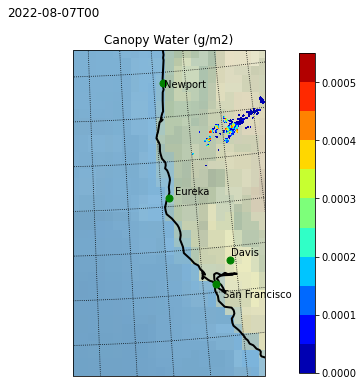

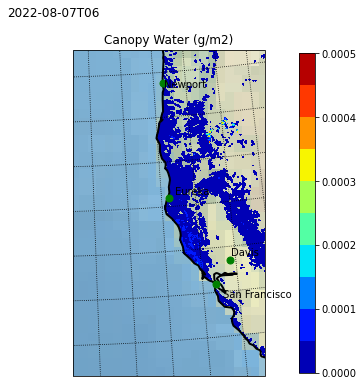

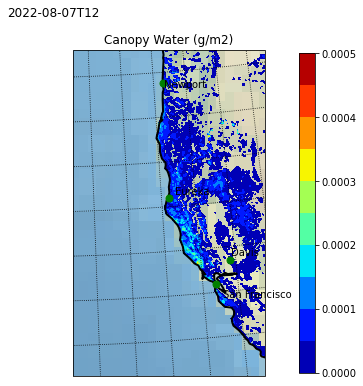

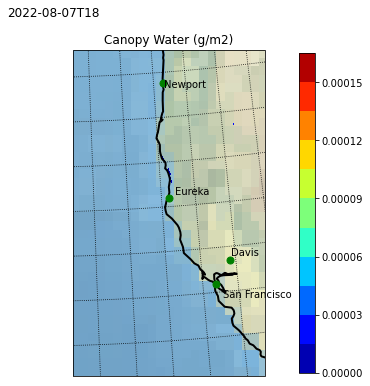

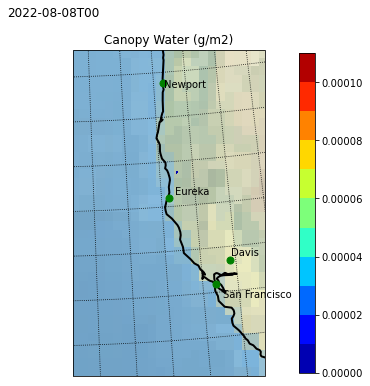

In [104]:
for i in range(21):  ##plot dominant veg
    # Get the latitude and longitude points
    plot_var = canopy_water
    lats, lons = latlon_coords(plot_var)

    # Get the cartopy mapping object
    cart_proj = get_cartopy(plot_var)

    # Create a figure
    fig = plt.figure(figsize=(12,6))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    # states = NaturalEarthFeature(category="cultural", scale="50m",
    #                              facecolor="none",
    #                              name="admin_1_states_provinces_shp")
    # ax.add_feature(states, linewidth=.5, edgecolor="black")
    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    # ax.states()
    # Make the contour outlines and filled contours for the smoothed sea level
    # pressure.
    # plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
    #             transform=crs.PlateCarree())
    # cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
    # Set the map bounds
    ax.set_xlim(np.array([211998, 911998.79804706]))
    ax.set_ylim(np.array([-760499.39631137, 429000]))

    plt.contourf(to_np(lons), to_np(lats),
                 np.where(to_np(plot_var.isel(Time = i )) ==0, np.nan, to_np(plot_var.isel(Time = i )) )
                 , 10,
                 transform=crs.PlateCarree(),
                 cmap=get_cmap("jet"))

    # Add a color bar
    cb = plt.colorbar(ax=ax, shrink=.98)


    # mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    plt.title("Canopy Water (g/m2)" )
    plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])

    plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
    #                     interval=100)

    # plt.show()
    # ani.save('sine_wave.gif', writer='imagemagick')

/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


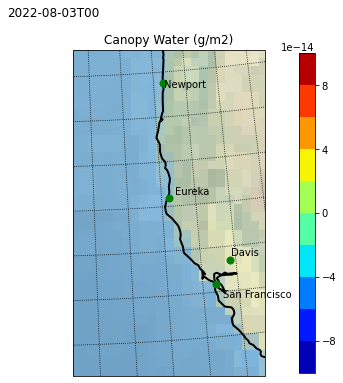

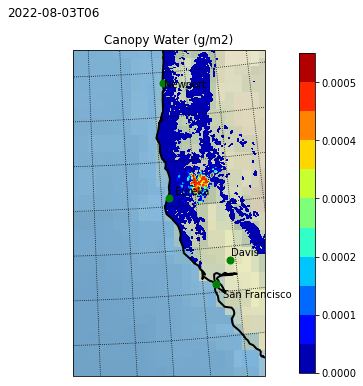

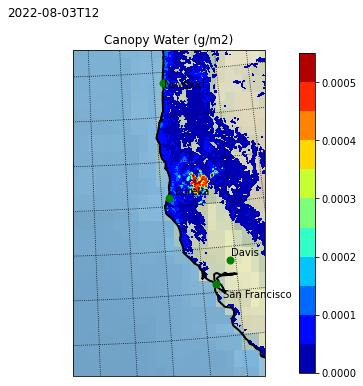

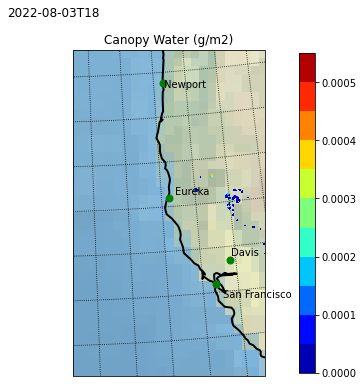

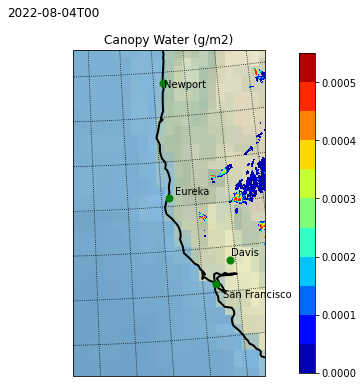

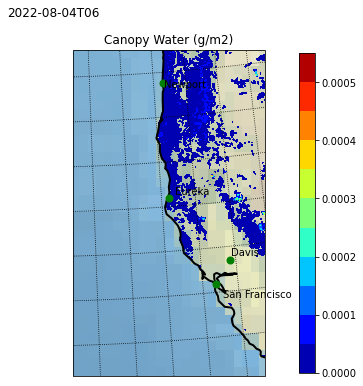

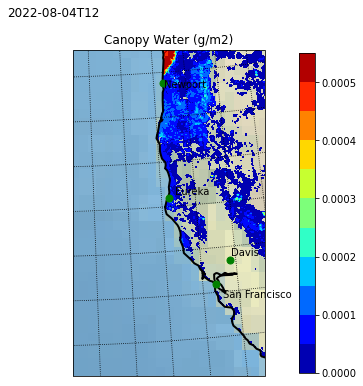

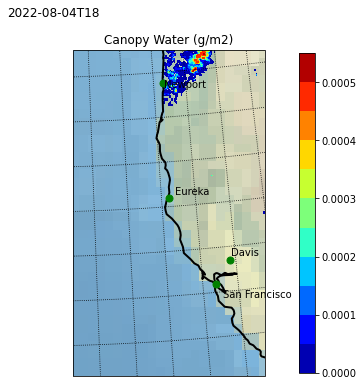

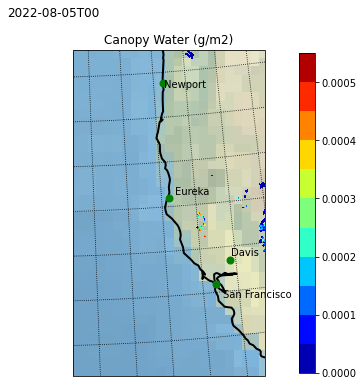

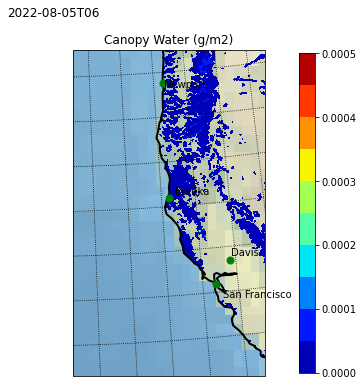

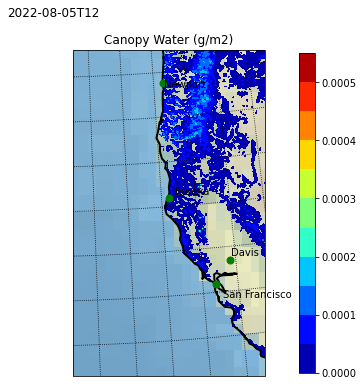

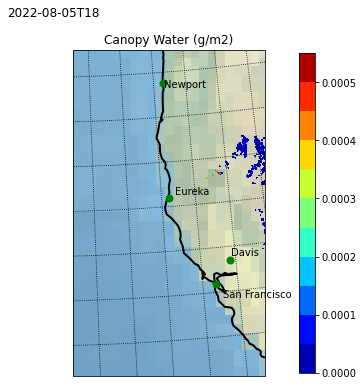

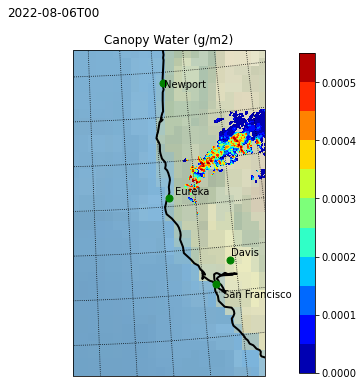

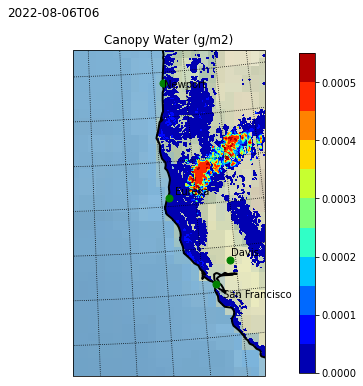

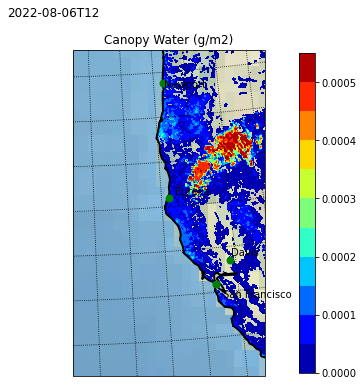

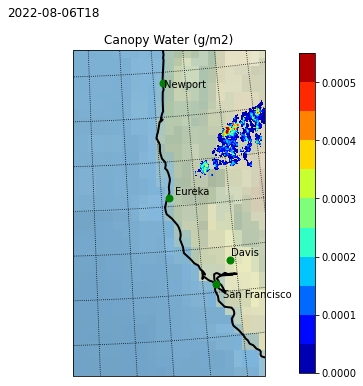

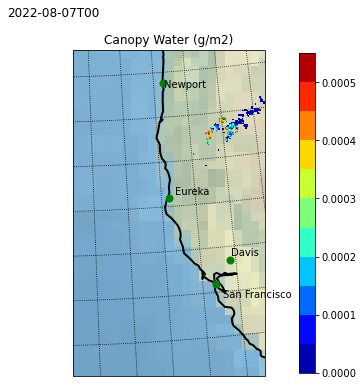

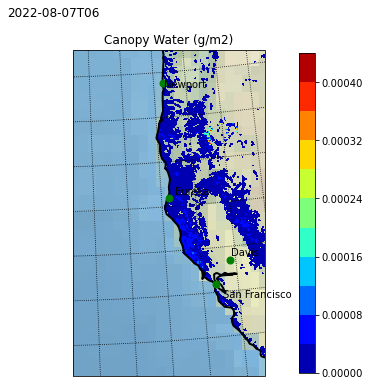

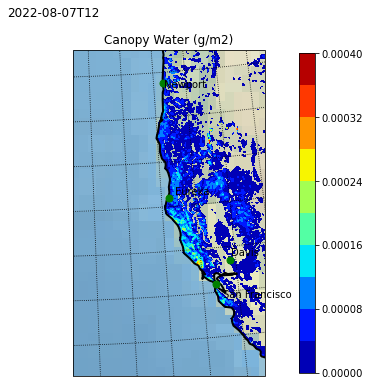

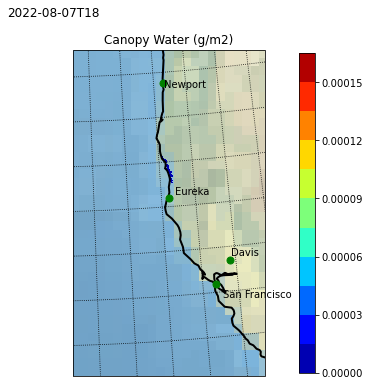

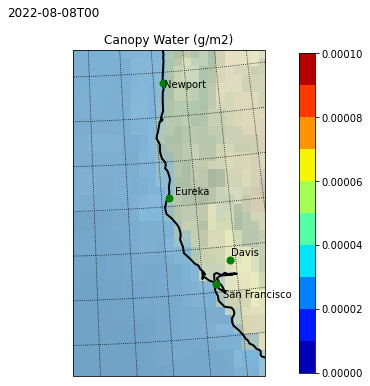

In [106]:
for i in range(21):  ##plot dominant veg
    # Get the latitude and longitude points
    plot_var = canopy_water
    lats, lons = latlon_coords(plot_var)

    # Get the cartopy mapping object
    cart_proj = get_cartopy(plot_var)

    # Create a figure
    fig = plt.figure(figsize=(12,6))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    # states = NaturalEarthFeature(category="cultural", scale="50m",
    #                              facecolor="none",
    #                              name="admin_1_states_provinces_shp")
    # ax.add_feature(states, linewidth=.5, edgecolor="black")
    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    # ax.states()
    # Make the contour outlines and filled contours for the smoothed sea level
    # pressure.
    # plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
    #             transform=crs.PlateCarree())
    # cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
    # Set the map bounds
    ax.set_xlim(np.array([211998, 911998.79804706]))
    ax.set_ylim(np.array([-760499.39631137, 429000]))

    plt.contourf(to_np(lons), to_np(lats),
                 np.where(to_np(plot_var.isel(Time = i )) ==0, np.nan, to_np(plot_var.isel(Time = i )) )
                 , 10,
                 transform=crs.PlateCarree(),
                 cmap=get_cmap("jet"))

    # Add a color bar
    cb = plt.colorbar(ax=ax, shrink=.98)


    # mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'go', markersize=7, transform=ccrs.Geodetic())
    ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    plt.title("Canopy Water (g/m2)" )
    plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])

    plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
    #                     interval=100)

    # plt.show()
    # ani.save('sine_wave.gif', writer='imagemagick')

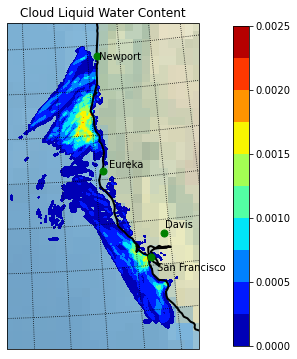

In [28]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = qcloud_sum
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(plot_var), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Cloud Liquid Water Content")

plt.show()

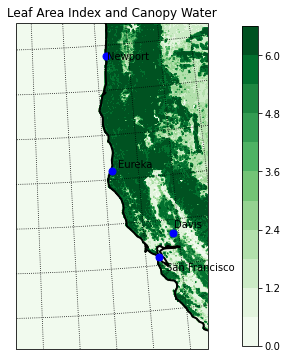

In [34]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = lai
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(plot_var), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Greens"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Leaf Area Index and Canopy Water")

plt.show()

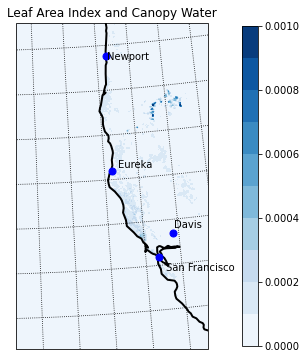

In [35]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = canopy_water_sum
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(plot_var), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Blues"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-122.2, 37.3, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-123.9, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-124, 44.5, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Leaf Area Index and Canopy Water")

plt.show()


In [109]:
# Get the latitude and longitude points
lats, lons = latlon_coords(qcloud_sum)

# Get the cartopy mapping object
cart_proj = get_cartopy(qcloud_sum)
cartopy_xlim(qcloud_sum)

[-974999.7746814161, 911998.798047055]

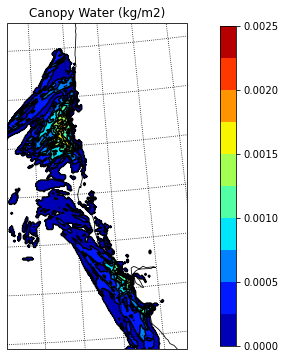

In [111]:

# Open the NetCDF file
# ncfile = Dataset("wrfout_d01_2016-10-07_00_00_00")

# # Get the sea level pressure
# slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
# smooth_slp = smooth2d(slp, 3, cenweight=4)


# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(qcloud_sum), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(qcloud_sum), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(np.array([311998, 911998.79804706]))
ax.set_ylim(np.array([-660499.39631137, 429000]))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Canopy Water (kg/m2)")

plt.show()

<xarray.DataArray 'QCLOUD' (Time: 4, bottom_top: 29, south_north: 594,
                            west_east: 630)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]]], dtype=float32)
Coordinates:
    XLONG     (south_north, west_east) float32 -141.7 -141.7 ... -118.4 -118.4
    XLAT      (south_north, west_east) float32 33.01 33.01 33.01 ... 49.26 49.26
    XTIME     (Time) float64 5.76e+03 6.12e+03 6.48e+03 6.84e+03
  * Time      (Time) datetime64[ns] 2022-08-07 ... 2022-08-07T18:00:00
    datetime  (Time) datetime64[ns] 2022-08-07 ... 2022-08-07T18:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  Cloud water mixing ratio
    units:        kg kg-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-131.0, moad_cen_lat=42.00000762...

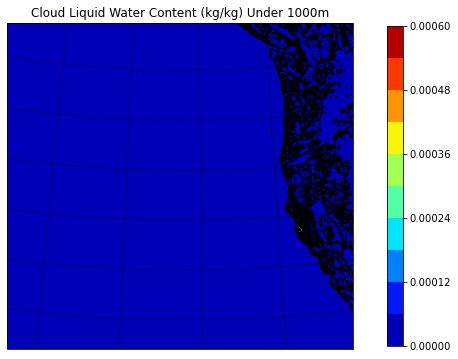

In [76]:
# Get the latitude and longitude points
lats, lons = latlon_coords(qcloud_sum)

# Get the cartopy mapping object
cart_proj = get_cartopy(qcloud_sum)


# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(qcloud_sum), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(qcloud_sum), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(qcloud_sum))
ax.set_ylim(cartopy_ylim(qcloud_sum))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Canopy Water kg m-2")

plt.show()

In [9]:
#### CODE FOR PLOT FROM https://wrf-python.readthedocs.io/en/latest/plot.html

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [7]:
data_path = dir + "wrfout_d02_2022-08-07_00:00:00"

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file
filename = data_path
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
# z = z.isel(bottom_top=slice(0,1,2))
wspd =  getvar(ncfile, "QVAPOR", timeidx=ALL_TIMES, method="cat")

# Create the start point and end point for the cross section
start_point = CoordPair(lat=40.8, lon=-123.9)
end_point = CoordPair(lat=36.1, lon=-121.0)
# wspd
# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
levs=[0,500,1000, 2000, 3000]
wspd_cross = vertcross(wspd, z, wrfin=ncfile, levels=levs, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
wspd

<xarray.DataArray 'QVAPOR' (Time: 2, bottom_top: 29, south_north: 594,
                            west_east: 630)>
array([[[[1.10087274e-02, 1.08316382e-02, 1.07982876e-02, ...,
          1.17151299e-02, 1.17197502e-02, 1.17255906e-02],
         [1.09245479e-02, 1.08784745e-02, 1.09017314e-02, ...,
          1.17055047e-02, 1.17103960e-02, 1.17177395e-02],
         [1.09244389e-02, 1.08665023e-02, 1.08486004e-02, ...,
          1.16971992e-02, 1.17026940e-02, 1.17104007e-02],
         ...,
         [9.25671589e-03, 9.25595220e-03, 9.25407838e-03, ...,
          4.93377680e-03, 5.02845598e-03, 5.20583708e-03],
         [9.25779995e-03, 9.25629586e-03, 9.25375428e-03, ...,
          4.89610294e-03, 5.01457276e-03, 5.18458849e-03],
         [9.26048774e-03, 9.26010031e-03, 9.25459899e-03, ...,
          4.88123065e-03, 4.98639373e-03, 5.16217574e-03]],

        [[1.06337098e-02, 1.05098234e-02, 1.05232988e-02, ...,
          1.14375800e-02, 1.14452867e-02, 1.14552537e-02],
         [1.05882008e-02, 1.04303230e-02, 1.04616685e-02, ...,
          1.14280544e-02, 1.14360228e-02, 1.14467852e-02],
         [1.05971713e-02, 1.04859984e-02, 1.04827229e-02, ...,
          1.14190988e-02, 1.14276782e-02, 1.14393327e-02],
...
          1.89700279e-06, 1.89258117e-06, 1.89396440e-06],
         [1.85438216e-06, 1.85232534e-06, 1.85056456e-06, ...,
          1.90222454e-06, 1.89976356e-06, 1.89987668e-06],
         [1.85444139e-06, 1.85300189e-06, 1.85152589e-06, ...,
          1.90730361e-06, 1.90651508e-06, 1.90757419e-06]],

        [[1.82947383e-06, 1.83577583e-06, 1.83972077e-06, ...,
          1.72792056e-06, 1.73103240e-06, 1.73427372e-06],
         [1.83103737e-06, 1.83648160e-06, 1.83981535e-06, ...,
          1.72647481e-06, 1.72963280e-06, 1.73280011e-06],
         [1.83101258e-06, 1.83543432e-06, 1.83746545e-06, ...,
          1.72498812e-06, 1.72823422e-06, 1.73146350e-06],
         ...,
         [1.82742758e-06, 1.82902193e-06, 1.83062082e-06, ...,
          1.88645890e-06, 1.89753746e-06, 1.90436151e-06],
         [1.83416262e-06, 1.83587929e-06, 1.83735949e-06, ...,
          1.86600550e-06, 1.87541855e-06, 1.87999683e-06],
         [1.84027760e-06, 1.84227633e-06, 1.84384237e-06, ...,
          1.84695898e-06, 1.85404542e-06, 1.85697593e-06]]]],
      dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -141.7 -141.7 ... -118.4 -118.4
    XLAT     (south_north, west_east) float32 33.01 33.01 33.01 ... 49.26 49.26
    XTIME    (Time) float32 5.76e+03 6.12e+03
  * Time     (Time) datetime64[ns] 2022-08-07 2022-08-07T06:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  Water vapor mixing ratio
    units:        kg kg-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-131.0, moad_cen_lat=42.00000762...

TypeError: Input z must be 2D, not 3D

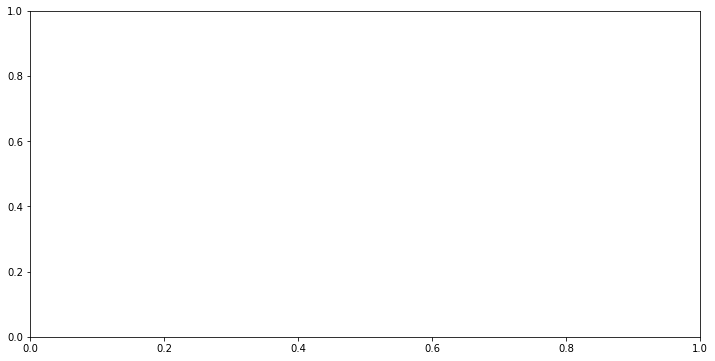

In [46]:

# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section of Wind Speed (kt)")

plt.show()



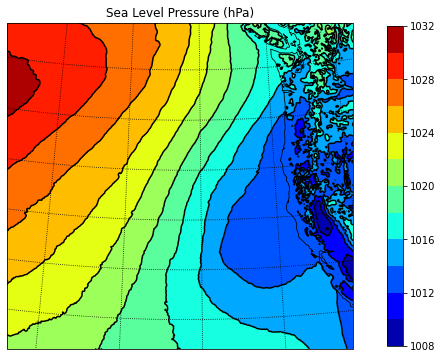

In [10]:
# Open the NetCDF file
ncfile = Dataset(data_path)

# Get the sea level pressure
slp = getvar(ncfile, "slp")


# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)


# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)


# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)


# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)


# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

In [27]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)


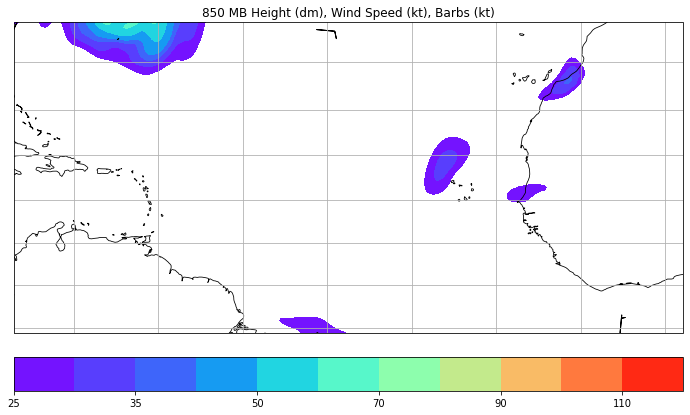

In [31]:

# Open the NetCDF file
ncfile = Dataset(data_path)

# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]

# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 850)
u_500 = interplevel(ua, p, 850)
v_500 = interplevel(va, p, 850)
wspd_500 = interplevel(wspd, p, 850)

# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),
                       levels=levels, colors="black",
                       transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500),
                             levels=levels,
                             cmap=get_cmap("rainbow"),
                             transform=crs.PlateCarree())
plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

# Add the 500 hPa wind barbs, only plotting every 125th data point.
plt.barbs(to_np(lons[::125,::125]), to_np(lats[::125,::125]),
          to_np(u_500[::125, ::125]), to_np(v_500[::125, ::125]),
          transform=crs.PlateCarree(), length=6)

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))

ax.gridlines()

plt.title("850 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()